In [1]:
import matplotlib.patches as patches
import Metrica_Viz as mviz
import Metrica_IO as mio
import numpy as np
import pandas as pd
from typing import List
from cmap import Colormap
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering, BisectingKMeans, KMeans, SpectralClustering
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
df = pd.read_csv("Sample_Game_2_RawTrackingData_Home_Team.csv")

C:\Users\noill\AppData\Local\Temp\ipykernel_44516\3567387257.py:1: DtypeWarning: Columns (0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Sample_Game_2_RawTrackingData_Home_Team.csv")


In [3]:
df = df.iloc[2:].reset_index()
df = df.drop(columns=["index"])
ball_x = df["Unnamed: 31"]
ball_y = df["Unnamed: 32"]
columns_to_drop = df.columns[df.iloc[0].isna()]
df = df.drop(columns=columns_to_drop)

In [4]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Home,Unnamed: 4,Home.1,Unnamed: 6,Home.2,Unnamed: 8,Home.3,...,Home.6,Unnamed: 16,Home.7,Unnamed: 18,Home.8,Unnamed: 20,Home.9,Unnamed: 22,Home.10,Unnamed: 24
0,1,1,0.04,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,...,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,0.94275,0.50413
1,1,2,0.08,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,...,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,0.94275,0.50413
2,1,3,0.12,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,...,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,0.94275,0.50413
3,1,4,0.16,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,...,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,0.94275,0.50413
4,1,5,0.2,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,...,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,0.94275,0.50413


In [5]:
head = "P_1-x"
headers = [head]

count = 1
for i in range(4, df.shape[1]):
    if "x" in headers[count-1]:
        head = f"P_{(count//2)+1}-y"
    else:
        head = f"P_{(count//2)+1}-x"
    headers.append(head)
    count += 1
    
headers = ["Period", "Frame", "Time[s]"] + headers
df.columns = headers

In [6]:
df.head()

,Period,Frame,Time[s],P_1-x,P_1-y,P_2-x,P_2-y,P_3-x,P_3-y,P_4-x,...,P_7-x,P_7-y,P_8-x,P_8-y,P_9-x,P_9-y,P_10-x,P_10-y,P_11-x,P_11-y
0,1,1,0.04,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,...,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,0.94275,0.50413
1,1,2,0.08,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,...,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,0.94275,0.50413
2,1,3,0.12,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,...,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,0.94275,0.50413
3,1,4,0.16,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,...,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,0.94275,0.50413
4,1,5,0.2,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,...,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,0.94275,0.50413


In [7]:
df.tail()

,Period,Frame,Time[s],P_1-x,P_1-y,P_2-x,P_2-y,P_3-x,P_3-y,P_4-x,...,P_7-x,P_7-y,P_8-x,P_8-y,P_9-x,P_9-y,P_10-x,P_10-y,P_11-x,P_11-y
141151,2,141152,5646.08,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,NaN,...,0.36216,0.56218,NaN,NaN,0.28426,0.35845,NaN,NaN,0.06285,0.51243
141152,2,141153,5646.12,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,NaN,...,0.36216,0.56218,NaN,NaN,0.28365,0.35933,NaN,NaN,0.06285,0.51243
141153,2,141154,5646.16,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,NaN,...,0.36216,0.56218,NaN,NaN,0.28322,0.36067,NaN,NaN,0.06285,0.51243
141154,2,141155,5646.2,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,NaN,...,0.36216,0.56218,NaN,NaN,0.28266,0.36095,NaN,NaN,0.06285,0.51243
141155,2,141156,5646.24,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,NaN,...,0.36216,0.56218,NaN,NaN,0.28201,0.36123,NaN,NaN,0.06285,0.51243


## You'll see the data goes from 0 to 1 on each axis. The coordiante (0,0) is the top left, (1,1) is the bottom right, and (0.5,0.5) is the kick off point.

In [8]:
df['Period'] = pd.to_numeric(df['Period'], errors='coerce')
df["ball-x"], df["ball-y"] = ball_x, ball_y
period_1_data = df[df["Period"] == 1]
period_1_data = period_1_data[50:]

In [9]:
period_1_data

,Period,Frame,Time[s],P_1-x,P_1-y,P_2-x,P_2-y,P_3-x,P_3-y,P_4-x,...,P_8-x,P_8-y,P_9-x,P_9-y,P_10-x,P_10-y,P_11-x,P_11-y,ball-x,ball-y
50,1,51,2.04,0.64787,0.27031,0.67763,0.42630,0.68143,0.54622,0.64436,...,0.53316,0.78648,0.5014,0.35295,0.50046,0.65322,0.94791,0.48986,0.50216,0.50376
51,1,52,2.08,0.64797,0.27005,0.67765,0.42629,0.68101,0.54602,0.64428,...,0.53323,0.78651,0.50128,0.35261,0.50036,0.65297,0.94779,0.49005,0.5004,0.50384
52,1,53,2.12,0.64805,0.26978,0.67767,0.42637,0.6806,0.54582,0.64418,...,0.53328,0.78657,0.50115,0.35226,0.50025,0.65270,0.94766,0.49025,0.4977,0.50397
53,1,54,2.16,0.64815,0.26943,0.67769,0.42634,0.6802,0.54562,0.64409,...,0.53334,0.78658,0.50102,0.35198,0.50011,0.65247,0.94756,0.49039,0.495,0.50410
54,1,55,2.2,0.64826,0.26908,0.6777,0.42630,0.67978,0.54545,0.64398,...,0.53341,0.78658,0.50088,0.35169,0.49994,0.65213,0.94746,0.49049,0.4923,0.50422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67936,1,67937,2717.48,0.51337,0.71683,0.52318,0.78966,0.54702,0.86195,0.51242,...,0.40066,0.50905,0.35073,0.59980,0.337,0.79222,0.81546,0.72958,NaN,NaN
67937,1,67938,2717.52,0.51339,0.71801,0.52312,0.79035,0.54692,0.86271,0.51242,...,0.40095,0.50993,0.35105,0.60026,0.33727,0.79263,0.81461,0.73064,NaN,NaN
67938,1,67939,2717.56,0.5134,0.71929,0.52312,0.79124,0.54677,0.86355,0.51242,...,0.40122,0.51062,0.35136,0.60081,0.33756,0.79303,0.81413,0.73124,NaN,NaN
67939,1,67940,2717.6,0.51342,0.72035,0.52315,0.79171,0.54673,0.86423,0.51242,...,0.40148,0.51078,0.35166,0.60165,0.33781,0.79344,0.81385,0.73124,NaN,NaN


In [10]:
period_1_data.iloc[0].iloc[3]

'0.64787'

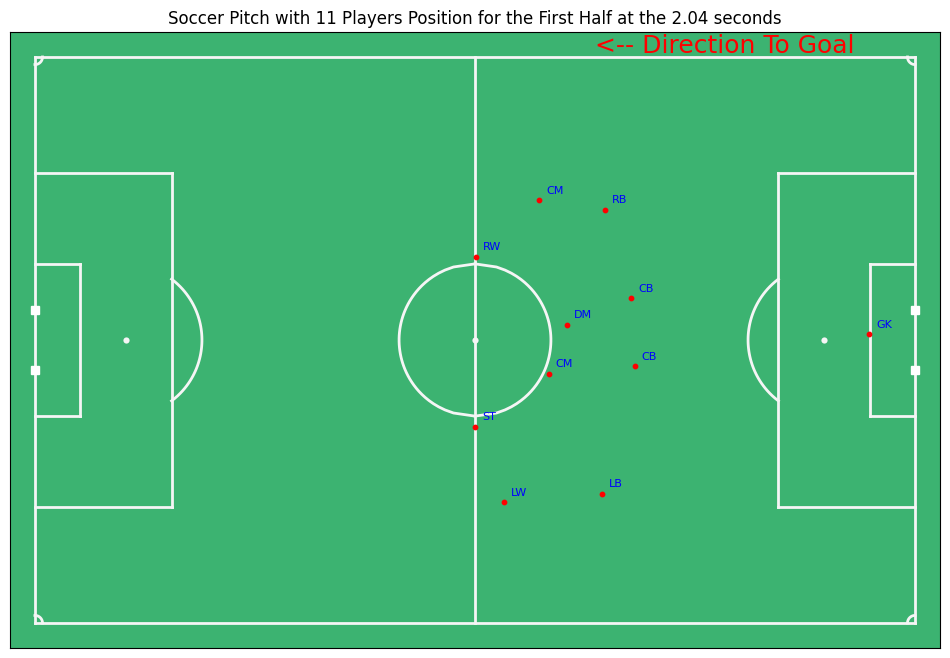

In [11]:
fig, ax = mviz.plot_pitch()

# Prepare player positions and their coordinates on the pitch
frame = period_1_data.iloc[0]
pos_x = [[float(frame.iloc[i]), period_1_data.columns[i]] for i in range(3, period_1_data.shape[1]) if "-x" in period_1_data.columns[i]]
pos_y = [[float(frame.iloc[i]), period_1_data.columns[i]] for i in range(3, period_1_data.shape[1]) if "-y" in period_1_data.columns[i]]

data_x, col_x = [item[0] for item in pos_x], [item[1] for item in pos_x]
data_y, col_y = [item[0] for item in pos_y], [item[1] for item in pos_y]

positions_x = pd.DataFrame([data_x], columns=col_x)
positions_y = pd.DataFrame([data_y], columns=col_y)

# # Changing the dataset to meter or pitch coordinates
positions_x = mio.to_metric_coordinates(positions_x)
positions_y = mio.to_metric_coordinates(positions_y)
player_pos = ["RB", "CB", "CB", "LB", "CM", "DM", "CM", "LW", "RW", "ST", "GK"]
MEAN_X_POS = positions_x.mean(axis=1)[0]
DIRECTION_TO_GOAL = "<--" if MEAN_X_POS > 0 else "-->"
DIRECTION_TO_GOAL += " Direction To Goal"

# Annotate player names
for i, (x, y, name) in enumerate(zip(positions_x.iloc[0], positions_y.iloc[0], player_pos)):
    ax.scatter(x, y, color="red", s=10, zorder=2)  # Plot red dot
    ax.annotate(name, (x, y), xytext=(5, 5), textcoords="offset points", fontsize=8, color='blue')
ax.annotate(DIRECTION_TO_GOAL, (MEAN_X_POS, 29.55), xytext=(MEAN_X_POS, 29.55), textcoords="offset points", fontsize=18, color="red")

seconds = frame.iloc[2]
plt.title(f"Soccer Pitch with 11 Players Position for the First Half at the {seconds} seconds")
plt.show()

In [12]:
period_1_data

,Period,Frame,Time[s],P_1-x,P_1-y,P_2-x,P_2-y,P_3-x,P_3-y,P_4-x,...,P_8-x,P_8-y,P_9-x,P_9-y,P_10-x,P_10-y,P_11-x,P_11-y,ball-x,ball-y
50,1,51,2.04,0.64787,0.27031,0.67763,0.42630,0.68143,0.54622,0.64436,...,0.53316,0.78648,0.5014,0.35295,0.50046,0.65322,0.94791,0.48986,0.50216,0.50376
51,1,52,2.08,0.64797,0.27005,0.67765,0.42629,0.68101,0.54602,0.64428,...,0.53323,0.78651,0.50128,0.35261,0.50036,0.65297,0.94779,0.49005,0.5004,0.50384
52,1,53,2.12,0.64805,0.26978,0.67767,0.42637,0.6806,0.54582,0.64418,...,0.53328,0.78657,0.50115,0.35226,0.50025,0.65270,0.94766,0.49025,0.4977,0.50397
53,1,54,2.16,0.64815,0.26943,0.67769,0.42634,0.6802,0.54562,0.64409,...,0.53334,0.78658,0.50102,0.35198,0.50011,0.65247,0.94756,0.49039,0.495,0.50410
54,1,55,2.2,0.64826,0.26908,0.6777,0.42630,0.67978,0.54545,0.64398,...,0.53341,0.78658,0.50088,0.35169,0.49994,0.65213,0.94746,0.49049,0.4923,0.50422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67936,1,67937,2717.48,0.51337,0.71683,0.52318,0.78966,0.54702,0.86195,0.51242,...,0.40066,0.50905,0.35073,0.59980,0.337,0.79222,0.81546,0.72958,NaN,NaN
67937,1,67938,2717.52,0.51339,0.71801,0.52312,0.79035,0.54692,0.86271,0.51242,...,0.40095,0.50993,0.35105,0.60026,0.33727,0.79263,0.81461,0.73064,NaN,NaN
67938,1,67939,2717.56,0.5134,0.71929,0.52312,0.79124,0.54677,0.86355,0.51242,...,0.40122,0.51062,0.35136,0.60081,0.33756,0.79303,0.81413,0.73124,NaN,NaN
67939,1,67940,2717.6,0.51342,0.72035,0.52315,0.79171,0.54673,0.86423,0.51242,...,0.40148,0.51078,0.35166,0.60165,0.33781,0.79344,0.81385,0.73124,NaN,NaN


## Tracking for individual Players for the First Period

In [13]:
period_1_data = period_1_data[50:120]

In [14]:
period_1_data

,Period,Frame,Time[s],P_1-x,P_1-y,P_2-x,P_2-y,P_3-x,P_3-y,P_4-x,...,P_8-x,P_8-y,P_9-x,P_9-y,P_10-x,P_10-y,P_11-x,P_11-y,ball-x,ball-y
100,1,101,4.04,0.65068,0.27656,0.67446,0.42416,0.66007,0.55359,0.64281,...,0.53035,0.78457,0.48183,0.38099,0.46751,0.60512,0.93882,0.49130,0.40757,0.50871
101,1,102,4.08,0.65064,0.27715,0.67451,0.42399,0.65974,0.55393,0.64301,...,0.53024,0.78437,0.48137,0.38260,0.46653,0.60325,0.93846,0.49140,0.40796,0.50877
102,1,103,4.12,0.65062,0.27774,0.67457,0.42388,0.65942,0.55426,0.64322,...,0.53015,0.78412,0.48092,0.38420,0.46557,0.60136,0.93809,0.49150,0.40835,0.50882
103,1,104,4.16,0.65061,0.27824,0.67466,0.42376,0.65913,0.55452,0.64343,...,0.53006,0.78383,0.48049,0.38572,0.46462,0.59946,0.93775,0.49154,0.40876,0.50892
104,1,105,4.2,0.6506,0.27882,0.67477,0.42364,0.65885,0.55478,0.64366,...,0.52999,0.78353,0.48009,0.38730,0.46369,0.59749,0.93742,0.49154,0.40917,0.50901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1,166,6.64,0.67508,0.22623,0.68449,0.38527,0.65459,0.53892,0.6642,...,0.53906,0.69424,0.49533,0.40193,0.43174,0.49053,0.91261,0.48959,0.43407,0.36321
166,1,167,6.68,0.67516,0.22449,0.68445,0.38423,0.65451,0.53838,0.6644,...,0.53922,0.69217,0.49548,0.40009,0.43157,0.48903,0.91216,0.48940,0.43452,0.35627
167,1,168,6.72,0.67518,0.22285,0.68442,0.38320,0.65444,0.53779,0.6646,...,0.53938,0.69019,0.49562,0.39826,0.43144,0.48761,0.9117,0.48920,0.43497,0.34934
168,1,169,6.76,0.67519,0.22112,0.68438,0.38217,0.6544,0.53715,0.6648,...,0.53956,0.68816,0.49575,0.39644,0.43134,0.48619,0.91124,0.48901,0.43542,0.34240


In [15]:
def player_tracking(dataset: pd.DataFrame, players: List[int] = [11], markersize: int = 1) -> None:
    fig, ax = mviz.plot_pitch()
    color_map = Colormap('tol:rainbow_discrete_3')
    ball_is_there = False
    
    for i, player in enumerate(players):
        x = f"P_{player}-x"
        y = f"P_{player}-y"
    
        # Prepare player positions and their coordinates on the pitch
        data_x = pd.to_numeric(dataset[x], errors='coerce')
        data_y = pd.to_numeric(dataset[y], errors='coerce')
        # Ball positions
        ba_x = pd.to_numeric(dataset["ball-x"], errors='coerce')
        ba_y = pd.to_numeric(dataset["ball-y"], errors='coerce')
        
        # Create DataFrames with a single column for x and y coordinate of a player
        positions_x = pd.DataFrame(data_x, columns=[x])
        positions_y = pd.DataFrame(data_y, columns=[y])
        ba_x = pd.DataFrame(ba_x, columns=["ball-x"])
        ba_y = pd.DataFrame(ba_y, columns=["ball-y"])
        
        # Changing the dataset to metric or pitch coordinates
        positions_x = mio.to_metric_coordinates(positions_x)
        positions_y = mio.to_metric_coordinates(positions_y)
        
        ba_x = mio.to_metric_coordinates(ba_x)
        ba_y = mio.to_metric_coordinates(ba_y)
        
        player_pos = ["RB", "CB", "CB", "LB", "CM", "DM", "CM", "LW", "RW", "ST", "GK"]
        
        color = color_map(i / len(players))
        
        # Plot player movement with arrows
        for j in range(len(positions_x) - 1):
            current_x = positions_x[x].iloc[j]
            current_y = positions_y[y].iloc[j]
            next_x = positions_x[x].iloc[j+1]
            next_y = positions_y[y].iloc[j+1]
            
            # Calculate arrow properties
            dx = next_x - current_x
            dy = next_y - current_y
            
            # Only plot arrow if there's significant movement
            if abs(dx) > 0.1 or abs(dy) > 0.1:
                ax.arrow(current_x, current_y, dx, dy, head_width=1.2, head_length=1.2, fc=color, ec=color, length_includes_head=True)
        
        ax.plot(positions_x[x], positions_y[y], marker=".", markersize=markersize, color=color, label=f"Player {player} ({player_pos[player-1]})")  # Plot players
        ax.annotate("Initial Point", (positions_x[x].iloc[0], positions_y[y].iloc[0]), xytext=(5, 5), textcoords="offset points", fontsize=8, color=color)
        
        if not ball_is_there:       
            ax.plot(ba_x["ball-x"], ba_y["ball-y"], marker=".", markersize=int(markersize * 1.5), color="black", zorder=2, label="Ball")
            for i, (b_x, b_y) in enumerate(zip(ba_x["ball-x"], ba_y["ball-y"])):
                if i > 0:
                    # Plot ball movement arrows
                    prev_x, prev_y = ba_x["ball-x"].iloc[i-1], ba_y["ball-y"].iloc[i-1]
                    dx = b_x - prev_x
                    dy = b_y - prev_y
                    if abs(dx) > 0.1 or abs(dy) > 0.1:
                        ax.arrow(prev_x, prev_y, dx, dy, head_width=1.2, head_length=1.2, fc='black', ec='black', length_includes_head=True)
            
            ax.annotate("Initial Point", (ba_x["ball-x"].iloc[0], ba_y["ball-y"].iloc[0]), xytext=(5, 5), textcoords="offset points", fontsize=8, color="black")
            ax.annotate(DIRECTION_TO_GOAL, (MEAN_X_POS, 29.55), xytext=(MEAN_X_POS, 29.55), textcoords="offset points", fontsize=18, color="red")
            
        ball_is_there = True
    
    start_seconds = dataset["Time[s]"].iloc[0]
    end_seconds = dataset["Time[s]"].iloc[-1]
    pl = [i for i in players]
    ax.set_title(f"Tracking for Player {pl} in the First Half from {start_seconds} seconds to {float(end_seconds) // 60} minutes")
    ax.legend(title="Player and Ball colors", loc='upper left', fontsize=8)
    
    plt.show()

In [52]:
# player_tracking(period_1_data)
# player_tracking(period_1_data, [2])
# player_tracking(period_1_data, [5])
# player_tracking(period_1_data, [8])

# Grouping players time interval on 1 second interval

In [20]:
df['Period'] = pd.to_numeric(df['Period'], errors='coerce')
period_1_data = df[df["Period"] == 1]
period_1_data = period_1_data[49:]

In [21]:
period_1_data

,Period,Frame,Time[s],P_1-x,P_1-y,P_2-x,P_2-y,P_3-x,P_3-y,P_4-x,...,P_8-x,P_8-y,P_9-x,P_9-y,P_10-x,P_10-y,P_11-x,P_11-y,ball-x,ball-y
49,1,50,2,0.64779,0.27056,0.67763,0.42627,0.68182,0.54645,0.64443,...,0.53309,0.78647,0.50151,0.35328,0.50054,0.65342,0.94802,0.48966,NaN,NaN
50,1,51,2.04,0.64787,0.27031,0.67763,0.42630,0.68143,0.54622,0.64436,...,0.53316,0.78648,0.5014,0.35295,0.50046,0.65322,0.94791,0.48986,0.50216,0.50376
51,1,52,2.08,0.64797,0.27005,0.67765,0.42629,0.68101,0.54602,0.64428,...,0.53323,0.78651,0.50128,0.35261,0.50036,0.65297,0.94779,0.49005,0.5004,0.50384
52,1,53,2.12,0.64805,0.26978,0.67767,0.42637,0.6806,0.54582,0.64418,...,0.53328,0.78657,0.50115,0.35226,0.50025,0.65270,0.94766,0.49025,0.4977,0.50397
53,1,54,2.16,0.64815,0.26943,0.67769,0.42634,0.6802,0.54562,0.64409,...,0.53334,0.78658,0.50102,0.35198,0.50011,0.65247,0.94756,0.49039,0.495,0.50410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67936,1,67937,2717.48,0.51337,0.71683,0.52318,0.78966,0.54702,0.86195,0.51242,...,0.40066,0.50905,0.35073,0.59980,0.337,0.79222,0.81546,0.72958,NaN,NaN
67937,1,67938,2717.52,0.51339,0.71801,0.52312,0.79035,0.54692,0.86271,0.51242,...,0.40095,0.50993,0.35105,0.60026,0.33727,0.79263,0.81461,0.73064,NaN,NaN
67938,1,67939,2717.56,0.5134,0.71929,0.52312,0.79124,0.54677,0.86355,0.51242,...,0.40122,0.51062,0.35136,0.60081,0.33756,0.79303,0.81413,0.73124,NaN,NaN
67939,1,67940,2717.6,0.51342,0.72035,0.52315,0.79171,0.54673,0.86423,0.51242,...,0.40148,0.51078,0.35166,0.60165,0.33781,0.79344,0.81385,0.73124,NaN,NaN


In [22]:
period_1_data = period_1_data.drop(columns=["Frame"])

In [23]:
period_1_data

,Period,Time[s],P_1-x,P_1-y,P_2-x,P_2-y,P_3-x,P_3-y,P_4-x,P_4-y,...,P_8-x,P_8-y,P_9-x,P_9-y,P_10-x,P_10-y,P_11-x,P_11-y,ball-x,ball-y
49,1,2,0.64779,0.27056,0.67763,0.42627,0.68182,0.54645,0.64443,0.77118,...,0.53309,0.78647,0.50151,0.35328,0.50054,0.65342,0.94802,0.48966,NaN,NaN
50,1,2.04,0.64787,0.27031,0.67763,0.42630,0.68143,0.54622,0.64436,0.77154,...,0.53316,0.78648,0.5014,0.35295,0.50046,0.65322,0.94791,0.48986,0.50216,0.50376
51,1,2.08,0.64797,0.27005,0.67765,0.42629,0.68101,0.54602,0.64428,0.77197,...,0.53323,0.78651,0.50128,0.35261,0.50036,0.65297,0.94779,0.49005,0.5004,0.50384
52,1,2.12,0.64805,0.26978,0.67767,0.42637,0.6806,0.54582,0.64418,0.77242,...,0.53328,0.78657,0.50115,0.35226,0.50025,0.65270,0.94766,0.49025,0.4977,0.50397
53,1,2.16,0.64815,0.26943,0.67769,0.42634,0.6802,0.54562,0.64409,0.77287,...,0.53334,0.78658,0.50102,0.35198,0.50011,0.65247,0.94756,0.49039,0.495,0.50410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67936,1,2717.48,0.51337,0.71683,0.52318,0.78966,0.54702,0.86195,0.51242,0.77079,...,0.40066,0.50905,0.35073,0.59980,0.337,0.79222,0.81546,0.72958,NaN,NaN
67937,1,2717.52,0.51339,0.71801,0.52312,0.79035,0.54692,0.86271,0.51242,0.77079,...,0.40095,0.50993,0.35105,0.60026,0.33727,0.79263,0.81461,0.73064,NaN,NaN
67938,1,2717.56,0.5134,0.71929,0.52312,0.79124,0.54677,0.86355,0.51242,0.77079,...,0.40122,0.51062,0.35136,0.60081,0.33756,0.79303,0.81413,0.73124,NaN,NaN
67939,1,2717.6,0.51342,0.72035,0.52315,0.79171,0.54673,0.86423,0.51242,0.77079,...,0.40148,0.51078,0.35166,0.60165,0.33781,0.79344,0.81385,0.73124,NaN,NaN


In [24]:
# Convert all columns to numeric
for col in period_1_data.columns:
    if col != "Period" and col != "Time[s]":
        period_1_data[col] = pd.to_numeric(period_1_data[col], errors='coerce')
    else:
        period_1_data[col] = pd.to_numeric(period_1_data[col], errors='coerce').astype(int)

avg_1_sec = pd.DataFrame()

# Calculate averages for each column
for col in period_1_data.columns:
    averages = []
    for i in range(0, len(period_1_data), 25):
        group = period_1_data[col].iloc[i:i+25]
        avg = group.mean()
        averages.append(avg)
    
    # Add the averages for this column to avg_1_sec
    avg_1_sec[col] = averages   

# avg_1_sec.reset_index(drop=True, inplace=True)
avg_1_sec.index = range(1, len(avg_1_sec) + 1)

In [25]:
avg_1_sec = avg_1_sec.iloc[:30]
avg_1_sec.head()

,Period,Time[s],P_1-x,P_1-y,P_2-x,P_2-y,P_3-x,P_3-y,P_4-x,P_4-y,...,P_8-x,P_8-y,P_9-x,P_9-y,P_10-x,P_10-y,P_11-x,P_11-y,ball-x,ball-y
1,1.0,2.0,0.648977,0.267991,0.677310,0.426190,0.676776,0.545300,0.643221,0.776967,...,0.533559,0.786388,0.499149,0.351891,0.497457,0.648717,0.946624,0.491144,0.472012,0.505173
2,1.0,3.0,0.650789,0.270286,0.675239,0.425550,0.665746,0.549138,0.641799,0.791332,...,0.532222,0.785681,0.489133,0.363388,0.481119,0.626600,0.942613,0.491384,0.414058,0.507987
3,1.0,4.0,0.651538,0.280022,0.676080,0.422136,0.657685,0.555499,0.645750,0.804490,...,0.530143,0.779241,0.479126,0.397800,0.458304,0.583250,0.934777,0.491824,0.412091,0.510291
4,1.0,5.0,0.661151,0.268981,0.682081,0.410478,0.656046,0.552907,0.655068,0.800052,...,0.533756,0.750292,0.484144,0.423878,0.441997,0.532778,0.925100,0.492292,0.422118,0.504578
5,1.0,6.0,0.673464,0.232932,0.684514,0.389209,0.654967,0.541258,0.663216,0.772410,...,0.538476,0.702497,0.494125,0.407635,0.432850,0.495466,0.914331,0.490325,0.432264,0.390942


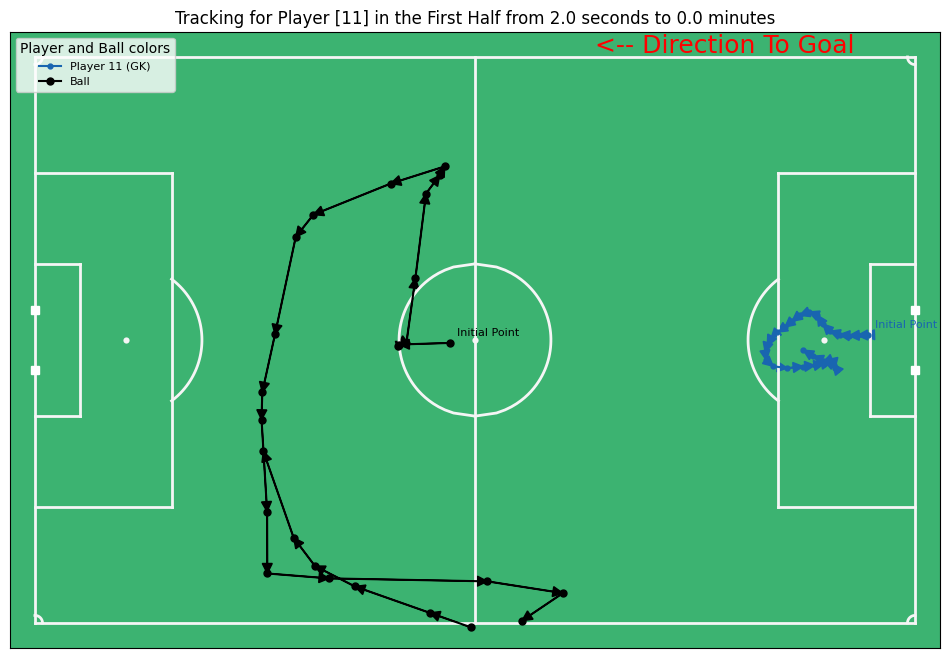

In [26]:
player_tracking(avg_1_sec, markersize=7)

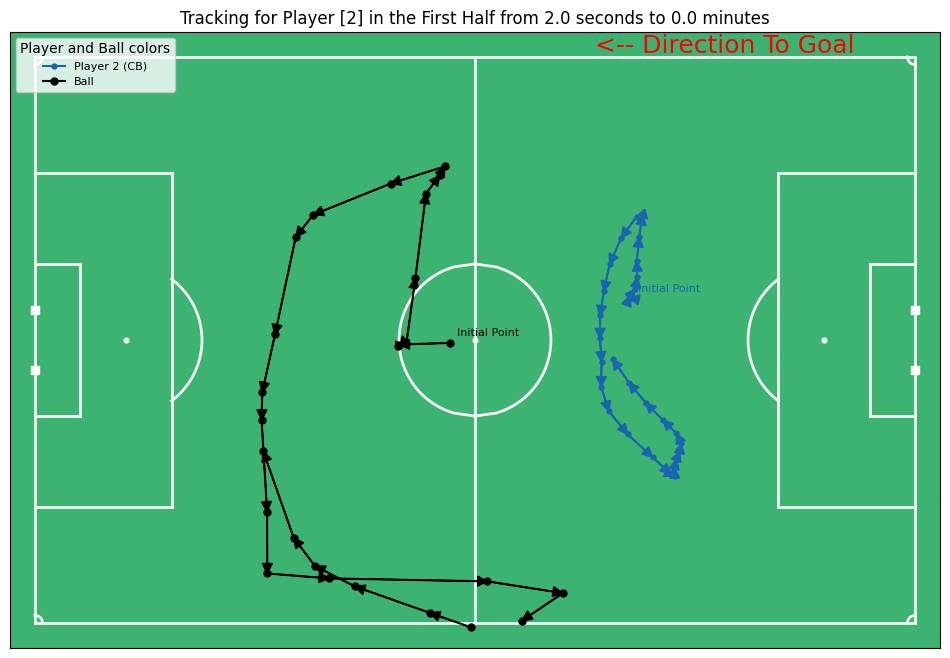

In [27]:
player_tracking(avg_1_sec, [2], markersize=7)

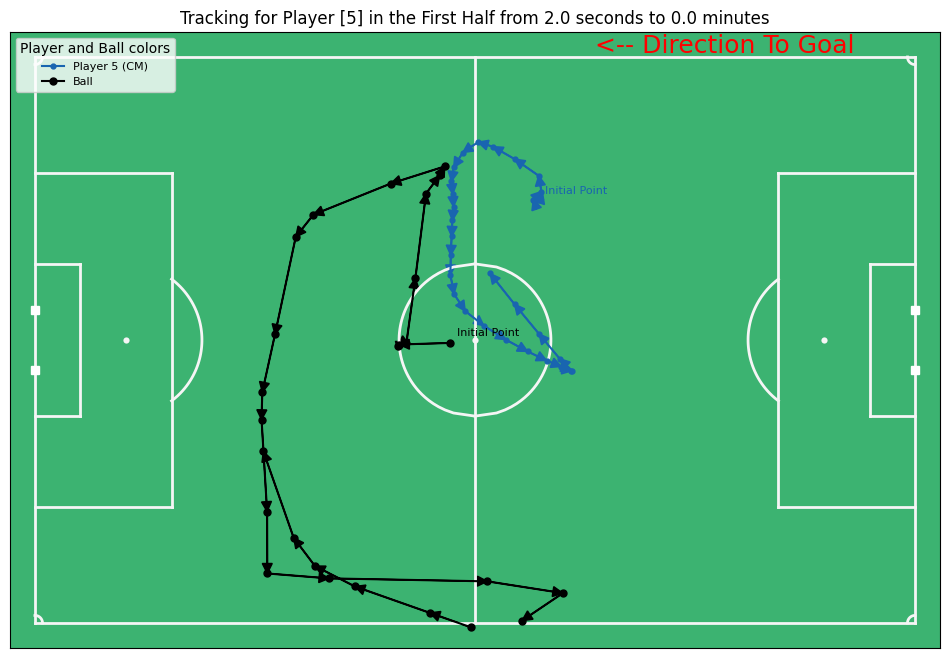

In [28]:
player_tracking(avg_1_sec, [5], markersize=7)

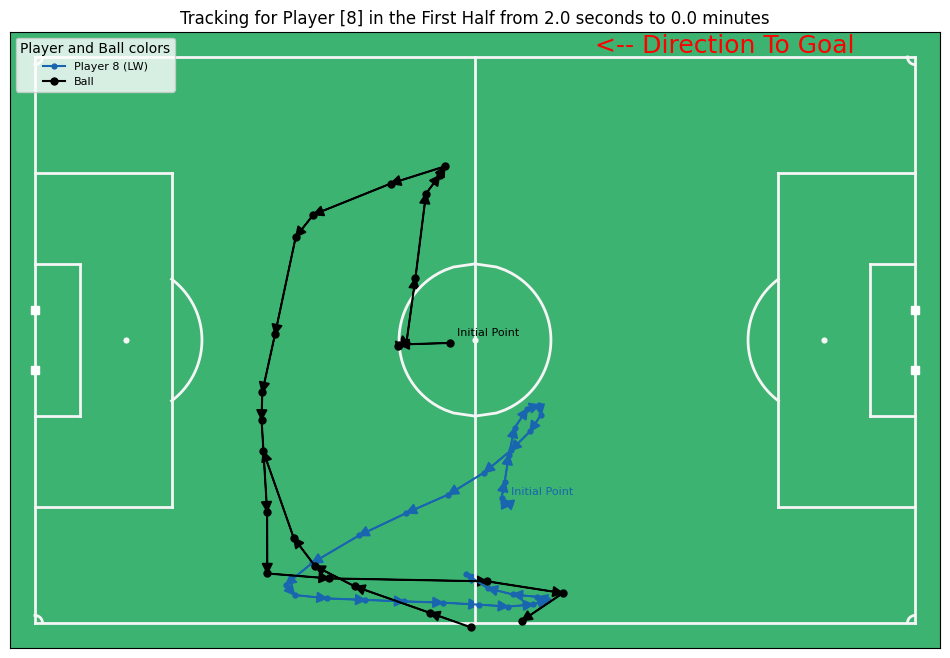

In [29]:
player_tracking(avg_1_sec, [8], markersize=7)

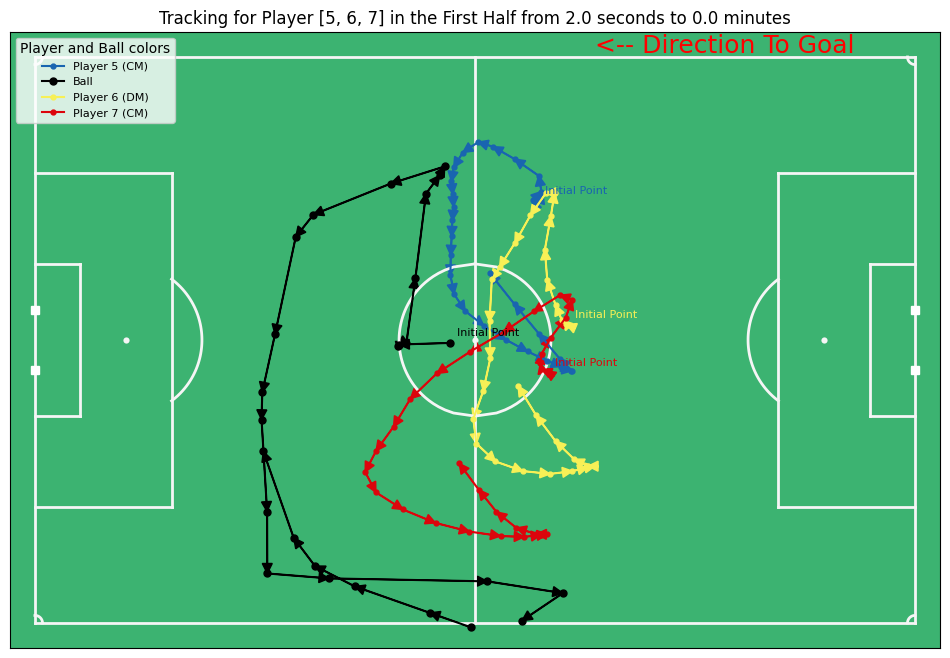

In [30]:
player_tracking(avg_1_sec, [5, 6, 7], markersize=7)

In [31]:
# Calculate players speed
def players_speed():
    MPS_TO_MPH = 2.23694
    player_columns = [(f'P_{i}-x', f'P_{i}-y') for i in range(1, 12)]
    
    for i, (x_col, y_col) in enumerate(player_columns, 1):
        # Calculate Euclidean distance between consecutive points
        x_diff = avg_1_sec[x_col].diff()
        y_diff = avg_1_sec[y_col].diff()
        distance = np.sqrt(x_diff**2 + y_diff**2)
        
        # Calculate time difference between frames
        time_diff = avg_1_sec['Time[s]'].diff()
        
        # Calculate speed (distance / time)
        # Note: First row will be NaN as we can't calculate speed for a single point
        speed = distance / time_diff
        speed_mph = speed * MPS_TO_MPH
        
        avg_1_sec[f"P_{i}_speed"] = speed_mph

players_speed()

In [32]:
avg_1_sec

,Period,Time[s],P_1-x,P_1-y,P_2-x,P_2-y,P_3-x,P_3-y,P_4-x,P_4-y,...,P_2_speed,P_3_speed,P_4_speed,P_5_speed,P_6_speed,P_7_speed,P_8_speed,P_9_speed,P_10_speed,P_11_speed
1,1.0,2.0,0.648977,0.267991,0.677310,0.426190,0.676776,0.545300,0.643221,0.776967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,3.0,0.650789,0.270286,0.675239,0.425550,0.665746,0.549138,0.641799,0.791332,...,0.004850,0.026123,0.032289,0.010148,0.004511,0.009173,0.003383,0.034109,0.061508,0.008988
3,1.0,4.0,0.651538,0.280022,0.676080,0.422136,0.657685,0.555499,0.645750,0.804490,...,0.007865,0.022972,0.030733,0.005885,0.019720,0.012321,0.015137,0.080168,0.109582,0.017556
4,1.0,5.0,0.661151,0.268981,0.682081,0.410478,0.656046,0.552907,0.655068,0.800052,...,0.029329,0.006860,0.023087,0.038104,0.060523,0.021394,0.065260,0.059405,0.118649,0.021672
5,1.0,6.0,0.673464,0.232932,0.684514,0.389209,0.654967,0.541258,0.663216,0.772410,...,0.047888,0.026169,0.064464,0.062654,0.101537,0.038326,0.107435,0.042645,0.085938,0.024489
6,1.0,7.0,0.669840,0.190549,0.683956,0.360810,0.656676,0.524347,0.668404,0.733431,...,0.063539,0.038022,0.087961,0.089726,0.121056,0.068304,0.108067,0.111556,0.068995,0.027972
7,1.0,8.0,0.657696,0.153282,0.686473,0.318212,0.667702,0.505663,0.676364,0.695906,...,0.095455,0.048530,0.085810,0.074136,0.133020,0.086107,0.080455,0.115049,0.060652,0.033056
8,1.0,9.0,0.647824,0.136526,0.690394,0.279177,0.678354,0.489310,0.683986,0.674580,...,0.087759,0.043657,0.050659,0.041658,0.092825,0.073655,0.034305,0.070136,0.028013,0.037807
9,1.0,10.0,0.639936,0.143972,0.683520,0.282219,0.674642,0.489078,0.680512,0.687184,...,0.016817,0.008321,0.029245,0.056499,0.022093,0.036122,0.038365,0.045045,0.045032,0.024599
10,1.0,11.0,0.636148,0.160667,0.666208,0.319347,0.660450,0.502044,0.667983,0.723948,...,0.091638,0.043001,0.086883,0.063304,0.095794,0.092877,0.071537,0.077465,0.084859,0.027238


In [33]:
def clustering_dataset() -> np.array:
    cm_1 = np.array([avg_1_sec["P_5-x"], avg_1_sec["P_5-y"]])
    cm_2 = np.array([avg_1_sec["P_6-x"], avg_1_sec["P_6-y"]])
    cm_3 = np.array([avg_1_sec["P_7-x"], avg_1_sec["P_7-y"]])

    X = np.concatenate([cm_1, cm_2, cm_3], axis=1).T
    label = np.array([np.full(len(avg_1_sec["P_5-x"]), 0), np.full(len(avg_1_sec["P_6-x"]), 1), np.full(len(avg_1_sec["P_7-x"]), 2)])
    label = label.reshape(-1, 1)
    label = label.flatten()
    
    return X, label

In [34]:
X, y_true = clustering_dataset()

In [35]:
X.shape

(90, 2)

In [36]:
def clustering():
    kmeans = KMeans(n_clusters=3, random_state=0, init="random", n_init="auto").fit(X)
    kmeans_plus = KMeans(n_clusters=3, random_state=0, init="k-means++", n_init="auto").fit(X)
    b_kmeans = BisectingKMeans(n_clusters=3, random_state=0, init="random").fit(X)
    s_clustering = SpectralClustering(n_clusters=3).fit(X)
    single = AgglomerativeClustering(n_clusters=3, linkage="single").fit(X)
    complete = AgglomerativeClustering(n_clusters=3, linkage="complete").fit(X)
    average = AgglomerativeClustering(n_clusters=3, linkage="average").fit(X)
    ward = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X)

    return kmeans, kmeans_plus, b_kmeans, s_clustering, single, complete, average, ward

In [37]:
def accuracy():
    result = []
    clusters = clustering()
    for clus in clusters:
        result.append(clus)
        y_pred = clus.fit_predict(X)        
        acc = accuracy_score(y_true, y_pred)

        print(np.round(acc, 2))

accuracy()

0.48
0.23
0.22
0.6
0.34
0.3
0.16
0.3


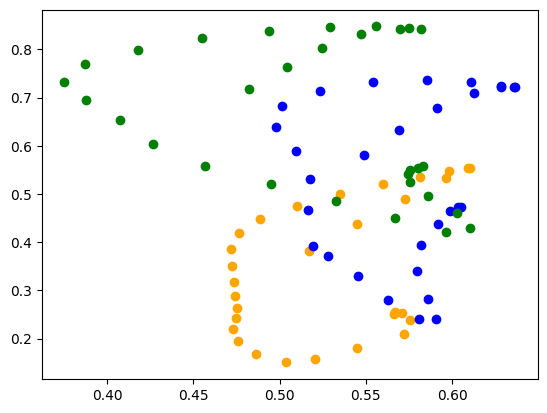

In [38]:
color = ["orange", "blue", "green"]
for i in range(90):
    if i < 30:
        plt.scatter(X[i][0], X[i][1], color="orange")
    elif i < 60 and i > 29:
        plt.scatter(X[i][0], X[i][1], color="blue")
    else:
        plt.scatter(X[i][0], X[i][1], color="green")
    plt.grid()
plt.show()

In [39]:
kmeans, kmeans_plus, b_kmeans, s_clustering, single_clu, complete_clu, average_clu, ward_clu = clustering()

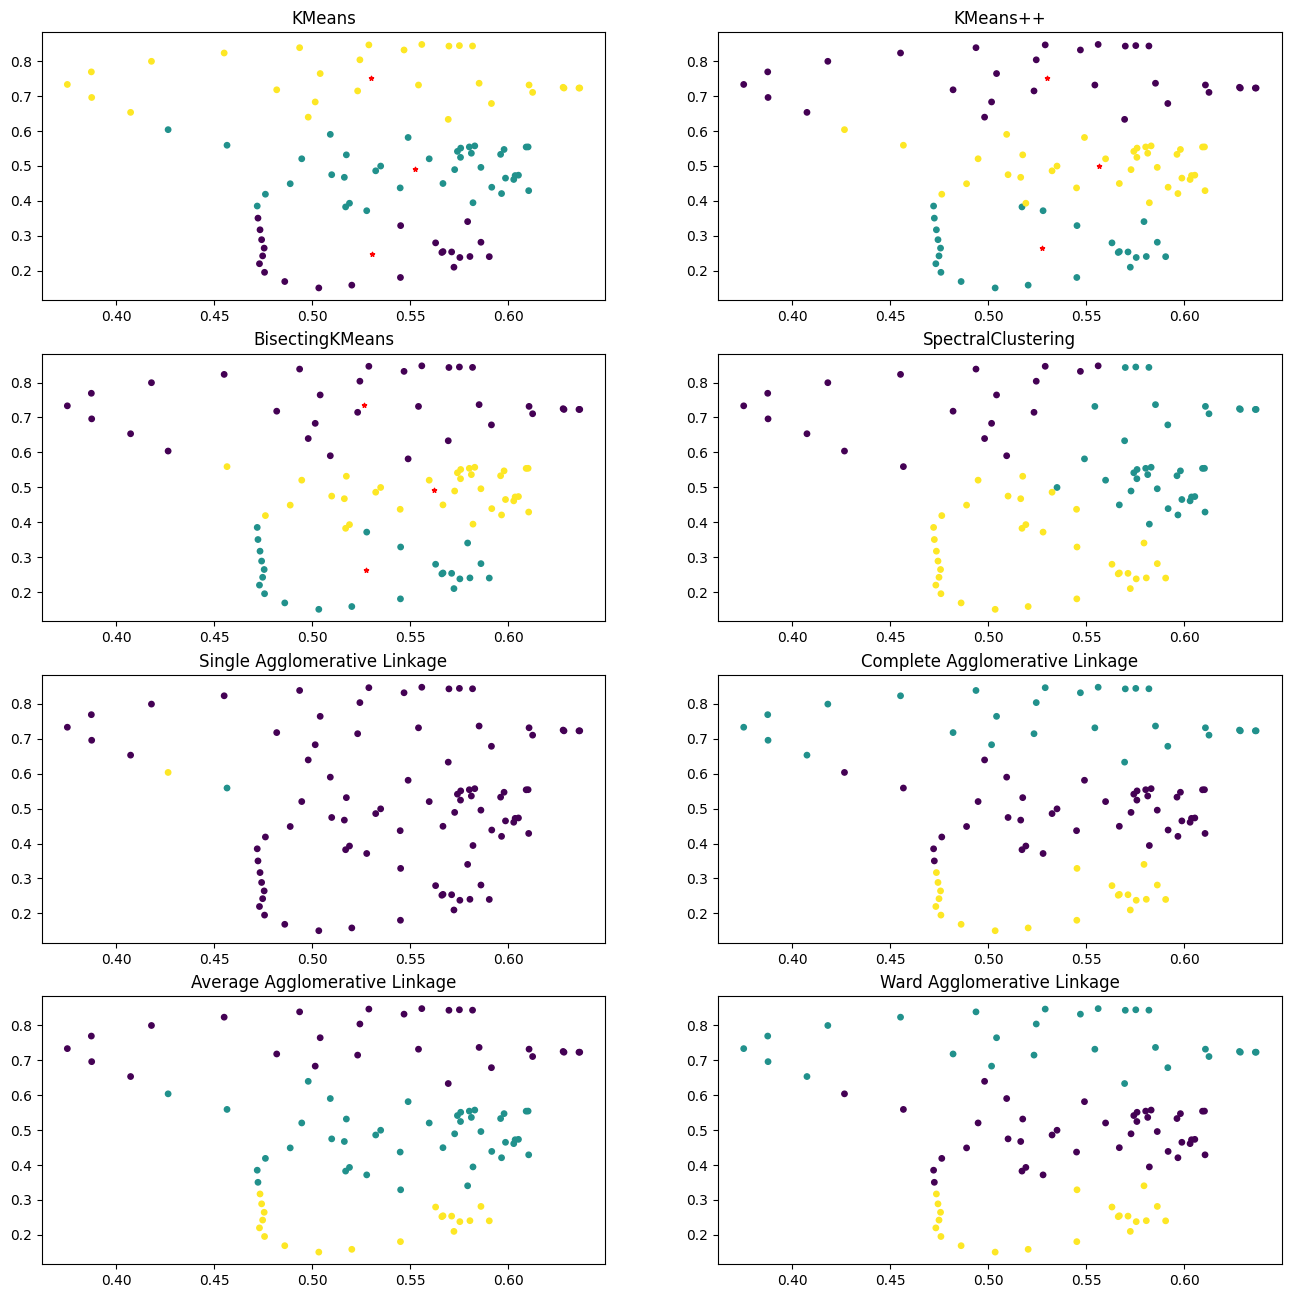

In [40]:
def plot_clusters():
    fig, ax = plt.subplots(4, 2, figsize=(16, 16))
    ax[0, 0].scatter(X[:, 0], X[:, 1], s=15, c=kmeans.labels_)
    ax[0, 0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=10, c="r", marker="*")
    ax[0, 0].set_title("KMeans")
    
    ax[0, 1].scatter(X[:, 0], X[:, 1], s=15, c=kmeans_plus.labels_)
    ax[0, 1].scatter(kmeans_plus.cluster_centers_[:, 0], kmeans_plus.cluster_centers_[:, 1], s=10, c="r", marker="*")
    ax[0, 1].set_title("KMeans++")
    
    ax[1, 0].scatter(X[:, 0], X[:, 1], s=15, c=b_kmeans.labels_)
    ax[1, 0].scatter(b_kmeans.cluster_centers_[:, 0], b_kmeans.cluster_centers_[:, 1], s=10, c="r", marker="*")
    ax[1, 0].set_title("BisectingKMeans")
    
    ax[1, 1].scatter(X[:, 0], X[:, 1], s=15, c=s_clustering.labels_)
    ax[1, 1].set_title("SpectralClustering")
    
    ax[2, 0].scatter(X[:, 0], X[:, 1], s=15, c=single_clu.labels_)
    ax[2, 0].set_title("Single Agglomerative Linkage")
    
    ax[2, 1].scatter(X[:, 0], X[:, 1], s=15, c=complete_clu.labels_)
    ax[2, 1].set_title("Complete Agglomerative Linkage")
    
    ax[3, 0].scatter(X[:, 0], X[:, 1], s=15, c=average_clu.labels_)
    ax[3, 0].set_title("Average Agglomerative Linkage")
    
    ax[3, 1].scatter(X[:, 0], X[:, 1], s=15, c=ward_clu.labels_)
    ax[3, 1].set_title("Ward Agglomerative Linkage")
    plt.show()
    
plot_clusters()

# Correlation Between Ball and Player

In [41]:
ball_player = avg_1_sec.loc[:, "P_1-x":"ball-y"]

In [42]:
ball_player

,P_1-x,P_1-y,P_2-x,P_2-y,P_3-x,P_3-y,P_4-x,P_4-y,P_5-x,P_5-y,...,P_8-x,P_8-y,P_9-x,P_9-y,P_10-x,P_10-y,P_11-x,P_11-y,ball-x,ball-y
1,0.648977,0.267991,0.677310,0.426190,0.676776,0.545300,0.643221,0.776967,0.571214,0.253519,...,0.533559,0.786388,0.499149,0.351891,0.497457,0.648717,0.946624,0.491144,0.472012,0.505173
2,0.650789,0.270286,0.675239,0.425550,0.665746,0.549138,0.641799,0.791332,0.566802,0.254574,...,0.532222,0.785681,0.489133,0.363388,0.481119,0.626600,0.942613,0.491384,0.414058,0.507987
3,0.651538,0.280022,0.676080,0.422136,0.657685,0.555499,0.645750,0.804490,0.566221,0.252008,...,0.530143,0.779241,0.479126,0.397800,0.458304,0.583250,0.934777,0.491824,0.412091,0.510291
4,0.661151,0.268981,0.682081,0.410478,0.656046,0.552907,0.655068,0.800052,0.575408,0.237664,...,0.533756,0.750292,0.484144,0.423878,0.441997,0.532778,0.925100,0.492292,0.422118,0.504578
5,0.673464,0.232932,0.684514,0.389209,0.654967,0.541258,0.663216,0.772410,0.572388,0.209819,...,0.538476,0.702497,0.494125,0.407635,0.432850,0.495466,0.914331,0.490325,0.432264,0.390942
6,0.669840,0.190549,0.683956,0.360810,0.656676,0.524347,0.668404,0.733431,0.545102,0.180419,...,0.545227,0.654660,0.496276,0.357812,0.436036,0.464787,0.903400,0.484251,0.444339,0.241323
7,0.657696,0.153282,0.686473,0.318212,0.667702,0.505663,0.676364,0.695906,0.520288,0.158450,...,0.559574,0.621679,0.496172,0.306380,0.449550,0.441281,0.895292,0.471897,0.459828,0.209286
8,0.647824,0.136526,0.690394,0.279177,0.678354,0.489310,0.683986,0.674580,0.503459,0.150475,...,0.573242,0.614725,0.489030,0.275851,0.461966,0.439646,0.888815,0.456286,0.465626,0.193352
9,0.639936,0.143972,0.683520,0.282219,0.674642,0.489078,0.680512,0.687184,0.486096,0.168819,...,0.575201,0.631764,0.468898,0.275405,0.460148,0.459695,0.879513,0.450421,0.404273,0.223610
10,0.636148,0.160667,0.666208,0.319347,0.660450,0.502044,0.667983,0.723948,0.475794,0.195176,...,0.562692,0.661195,0.444960,0.300429,0.445403,0.494648,0.868912,0.456411,0.316397,0.278592


In [43]:
player_pos = ["RB", "CB", "CB", "LB", "CM", "DM", "CM", "LW", "RW", "ST", "GK"]

x_ball_player = ball_player.loc[:, ball_player.columns.str.contains("x")]
y_ball_player = ball_player.loc[:, ball_player.columns.str.contains("y")]

x_ball_player.columns = (player_pos + [x_ball_player.columns[-1]])
y_ball_player.columns = (player_pos + [y_ball_player.columns[-1]])

In [44]:
x_ball_player

,RB,CB,CB,LB,CM,DM,CM,LW,RW,ST,GK,ball-x
1,0.648977,0.677310,0.676776,0.643221,0.571214,0.605284,0.583005,0.533559,0.499149,0.497457,0.946624,0.472012
2,0.650789,0.675239,0.665746,0.641799,0.566802,0.603600,0.580232,0.532222,0.489133,0.481119,0.942613,0.414058
3,0.651538,0.676080,0.657685,0.645750,0.566221,0.598681,0.575831,0.530143,0.479126,0.458304,0.934777,0.412091
4,0.661151,0.682081,0.656046,0.655068,0.575408,0.591668,0.574166,0.533756,0.484144,0.441997,0.925100,0.422118
5,0.673464,0.684514,0.654967,0.663216,0.572388,0.582097,0.575735,0.538476,0.494125,0.432850,0.914331,0.432264
6,0.669840,0.683956,0.656676,0.668404,0.545102,0.579369,0.586136,0.545227,0.496276,0.436036,0.903400,0.444339
7,0.657696,0.686473,0.667702,0.676364,0.520288,0.586158,0.602883,0.559574,0.496172,0.449550,0.895292,0.459828
8,0.647824,0.690394,0.678354,0.683986,0.503459,0.590410,0.610504,0.573242,0.489030,0.461966,0.888815,0.465626
9,0.639936,0.683520,0.674642,0.680512,0.486096,0.580543,0.596671,0.575201,0.468898,0.460148,0.879513,0.404273
10,0.636148,0.666208,0.660450,0.667983,0.475794,0.563034,0.566784,0.562692,0.444960,0.445403,0.868912,0.316397


In [45]:
y_ball_player

,RB,CB,CB,LB,CM,DM,CM,LW,RW,ST,GK,ball-y
1,0.267991,0.426190,0.545300,0.776967,0.253519,0.473360,0.557250,0.786388,0.351891,0.648717,0.491144,0.505173
2,0.270286,0.425550,0.549138,0.791332,0.254574,0.472251,0.554229,0.785681,0.363388,0.626600,0.491384,0.507987
3,0.280022,0.422136,0.555499,0.804490,0.252008,0.464935,0.550917,0.779241,0.397800,0.583250,0.491824,0.510291
4,0.268981,0.410478,0.552907,0.800052,0.237664,0.438804,0.541499,0.750292,0.423878,0.532778,0.492292,0.504578
5,0.232932,0.389209,0.541258,0.772410,0.209819,0.394433,0.524438,0.702497,0.407635,0.495466,0.490325,0.390942
6,0.190549,0.360810,0.524347,0.733431,0.180419,0.340385,0.495729,0.654660,0.357812,0.464787,0.484251,0.241323
7,0.153282,0.318212,0.505663,0.695906,0.158450,0.281309,0.461070,0.621679,0.306380,0.441281,0.471897,0.209286
8,0.136526,0.279177,0.489310,0.674580,0.150475,0.240031,0.429037,0.614725,0.275851,0.439646,0.456286,0.193352
9,0.143972,0.282219,0.489078,0.687184,0.168819,0.240453,0.420707,0.631764,0.275405,0.459695,0.450421,0.223610
10,0.160667,0.319347,0.502044,0.723948,0.195176,0.279534,0.449528,0.661195,0.300429,0.494648,0.456411,0.278592


## X-coordinates correlation

In [46]:
x_ball_player.corr()#.iloc[-1]

,RB,CB,CB,LB,CM,DM,CM,LW,RW,ST,GK,ball-x
RB,1.000000,0.825171,0.868260,0.657454,0.875913,0.842915,0.513422,0.507215,0.531903,0.459705,0.582149,0.248017
CB,0.825171,1.000000,0.856738,0.507811,0.722184,0.767798,0.436216,0.282281,0.371637,0.328532,0.542373,0.742217
CB,0.868260,0.856738,1.000000,0.774763,0.763797,0.925261,0.702427,0.622221,0.612393,0.613589,0.673618,0.382780
LB,0.657454,0.507811,0.774763,1.000000,0.648365,0.833330,0.908738,0.954587,0.825338,0.874917,0.710192,0.116480
CM,0.875913,0.722184,0.763797,0.648365,1.000000,0.896694,0.627034,0.562683,0.703201,0.632978,0.855369,0.349543
DM,0.842915,0.767798,0.925261,0.833330,0.896694,1.000000,0.840239,0.748380,0.814446,0.796318,0.876255,0.370464
CM,0.513422,0.436216,0.702427,0.908738,0.627034,0.840239,1.000000,0.927983,0.950377,0.957082,0.829831,0.273551
LW,0.507215,0.282281,0.622221,0.954587,0.562683,0.748380,0.927983,1.000000,0.887147,0.939561,0.697853,0.005006
RW,0.531903,0.371637,0.612393,0.825338,0.703201,0.814446,0.950377,0.887147,1.000000,0.952208,0.862473,0.277504
ST,0.459705,0.328532,0.613589,0.874917,0.632978,0.796318,0.957082,0.939561,0.952208,1.000000,0.844160,0.198508


## Y-coordinates correlation

In [47]:
y_ball_player.corr()#.iloc[-1]

,RB,CB,CB,LB,CM,DM,CM,LW,RW,ST,GK,ball-y
RB,1.000000,0.881631,0.844947,0.849909,0.967364,0.932867,0.944843,0.917228,0.960126,0.931788,0.915229,0.883411
CB,0.881631,1.000000,0.982490,0.982468,0.953096,0.981535,0.980817,0.970488,0.940450,0.964832,0.974429,0.980041
CB,0.844947,0.982490,1.000000,0.952150,0.940418,0.956692,0.969212,0.944531,0.914858,0.938122,0.954057,0.940194
LB,0.849909,0.982468,0.952150,1.000000,0.924717,0.956762,0.952109,0.956270,0.929689,0.936495,0.942207,0.970012
CM,0.967364,0.953096,0.940418,0.924717,1.000000,0.964001,0.986459,0.955715,0.970699,0.968248,0.946515,0.938396
DM,0.932867,0.981535,0.956692,0.956762,0.964001,1.000000,0.988673,0.987373,0.960434,0.983512,0.988474,0.971451
CM,0.944843,0.980817,0.969212,0.952109,0.986459,0.988673,1.000000,0.979902,0.977161,0.979810,0.980974,0.967376
LW,0.917228,0.970488,0.944531,0.956270,0.955715,0.987373,0.979902,1.000000,0.956924,0.990117,0.970267,0.982110
RW,0.960126,0.940450,0.914858,0.929689,0.970699,0.960434,0.977161,0.956924,1.000000,0.943743,0.960936,0.941956
ST,0.931788,0.964832,0.938122,0.936495,0.968248,0.983512,0.979810,0.990117,0.943743,1.000000,0.960139,0.972206
